In [85]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [86]:
import pandas as pd

In [87]:
import matplotlib.pyplot as plt

In [88]:
import numpy as np
import seaborn as sns

In [89]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', 400)

## Importing dataset

In [90]:
df_raw=pd.read_csv("survey_results_public.csv")

In [91]:
#df_raw.head()

## Checking the Dataset
    *preliminary analysis of the data:
    checking columns, the null count, turning categorical data to numerical ones

In [92]:
df_raw.info()
df_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [93]:
#df.columns

#### Removing Nulls from ConvertedCompYearly

In [94]:
df = df_raw.dropna(subset= ['ConvertedCompYearly'])

In [95]:
#Turning the data column Salary to integers
df.loc[:,"ConvertedCompYearly"].astype(int)                

1        285000
2        250000
3        156000
4         23456
5         96828
          ...  
89162     50719
89166     16917
89167     15752
89170     64254
89171     61041
Name: ConvertedCompYearly, Length: 48019, dtype: int32

In [96]:
df = df[(df.ConvertedCompYearly < 250000) & (df.ConvertedCompYearly > 1000)]

In [97]:
##dfa=pd.cut(df.ConvertedCompYearly,[0,5,95,100, right=True])

In [98]:
df[df.Q120 == "I agree"].count()

ResponseId             45359
Q120                   45359
MainBranch             45359
Age                    45359
Employment             45347
                       ...  
ProfessionalTech       30090
Industry               26262
SurveyLength           44900
SurveyEase             44937
ConvertedCompYearly    45359
Length: 84, dtype: int64

--We can remove column Q120
--We can turn RemoteWork [remote, in person, hybrid] input to numerical

In [99]:
df['AISearchHaveWorkedWith'].str.split(';')

3                                        NaN
4                                  [ChatGPT]
5        [ChatGPT, Google Bard AI, Neeva AI]
6                                  [ChatGPT]
7         [Bing AI, ChatGPT, Google Bard AI]
                        ...                 
89162                                    NaN
89166                              [ChatGPT]
89167                              [ChatGPT]
89170                              [ChatGPT]
89171                                    NaN
Name: AISearchHaveWorkedWith, Length: 45359, dtype: object

In [100]:
df['ConvertedCompYearly'].describe()

count     45359.000000
mean      83405.381975
std       53632.029804
min        1009.000000
25%       44000.000000
50%       74000.000000
75%      115000.000000
max      249518.000000
Name: ConvertedCompYearly, dtype: float64

In [101]:
#df.hist("ConvertedCompYearly", bins=100)

In [102]:
df[df.ConvertedCompYearly< 200000].ConvertedCompYearly.median()

70679.0

--The difference between med and mean

In [103]:
df['Country'].value_counts().reset_index().head(20)

,index,Country
0,United States of America,10257
1,Germany,3919
2,United Kingdom of Great Britain and Northern Ireland,3470
3,Canada,2041
4,India,1827
5,France,1785
6,Netherlands,1337
7,Poland,1254
8,Brazil,1223
9,Australia,1182


In [104]:
df_raw.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,...,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Bootstrapping a business;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;Friend or family member;Hackathons (virtual or in-person);Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Auditory material (e.g., podcasts);Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow",Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,...,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testing;Observability tools,"Information Services, IT, Software Development, or other Technology",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;How-to videos;Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow",NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",...,Agree,Agree,Agree,Agree,Agree,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testing;Observability tools;Innersource initiative;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery,"Information Services, IT, Software Development, or other Technology",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Auditory material (e.g., podcasts);Written Tutorials;Stack Overflow;Interactive tutorial",NaN,12,7,"Developer, front-end",100 to 499 employees,...,Strongly agree,Agree,Neither agree nor disagree,Agree,Agree,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) and (more often) continuous delivery,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, freelancer, or self-employed",Remote,Hobby;Contribute to open-source projects;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Online Courses or Certification;Other

In [105]:
df = df_raw.dropna(subset= ['EdLevel'])

In [106]:
education_mapping = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 1,
    'Some college/university study without earning a degree': 2,
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 3,
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 4,
    'Associate degree (A.A., A.S., etc.)': 5,
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 6,
    'Primary/elementary school': 7,
    'Something else': 8
}

In [107]:
df['EdLevel'] = df['EdLevel'].map(education_mapping)

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9628\659515745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EdLevel'] = df['EdLevel'].map(education_mapping)


<Figure size 2000x3000 with 0 Axes>

(array([36706., 11753., 20543.,     0.,  3887.,  2807.,     0.,  8897.,
         1905.,  1475.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

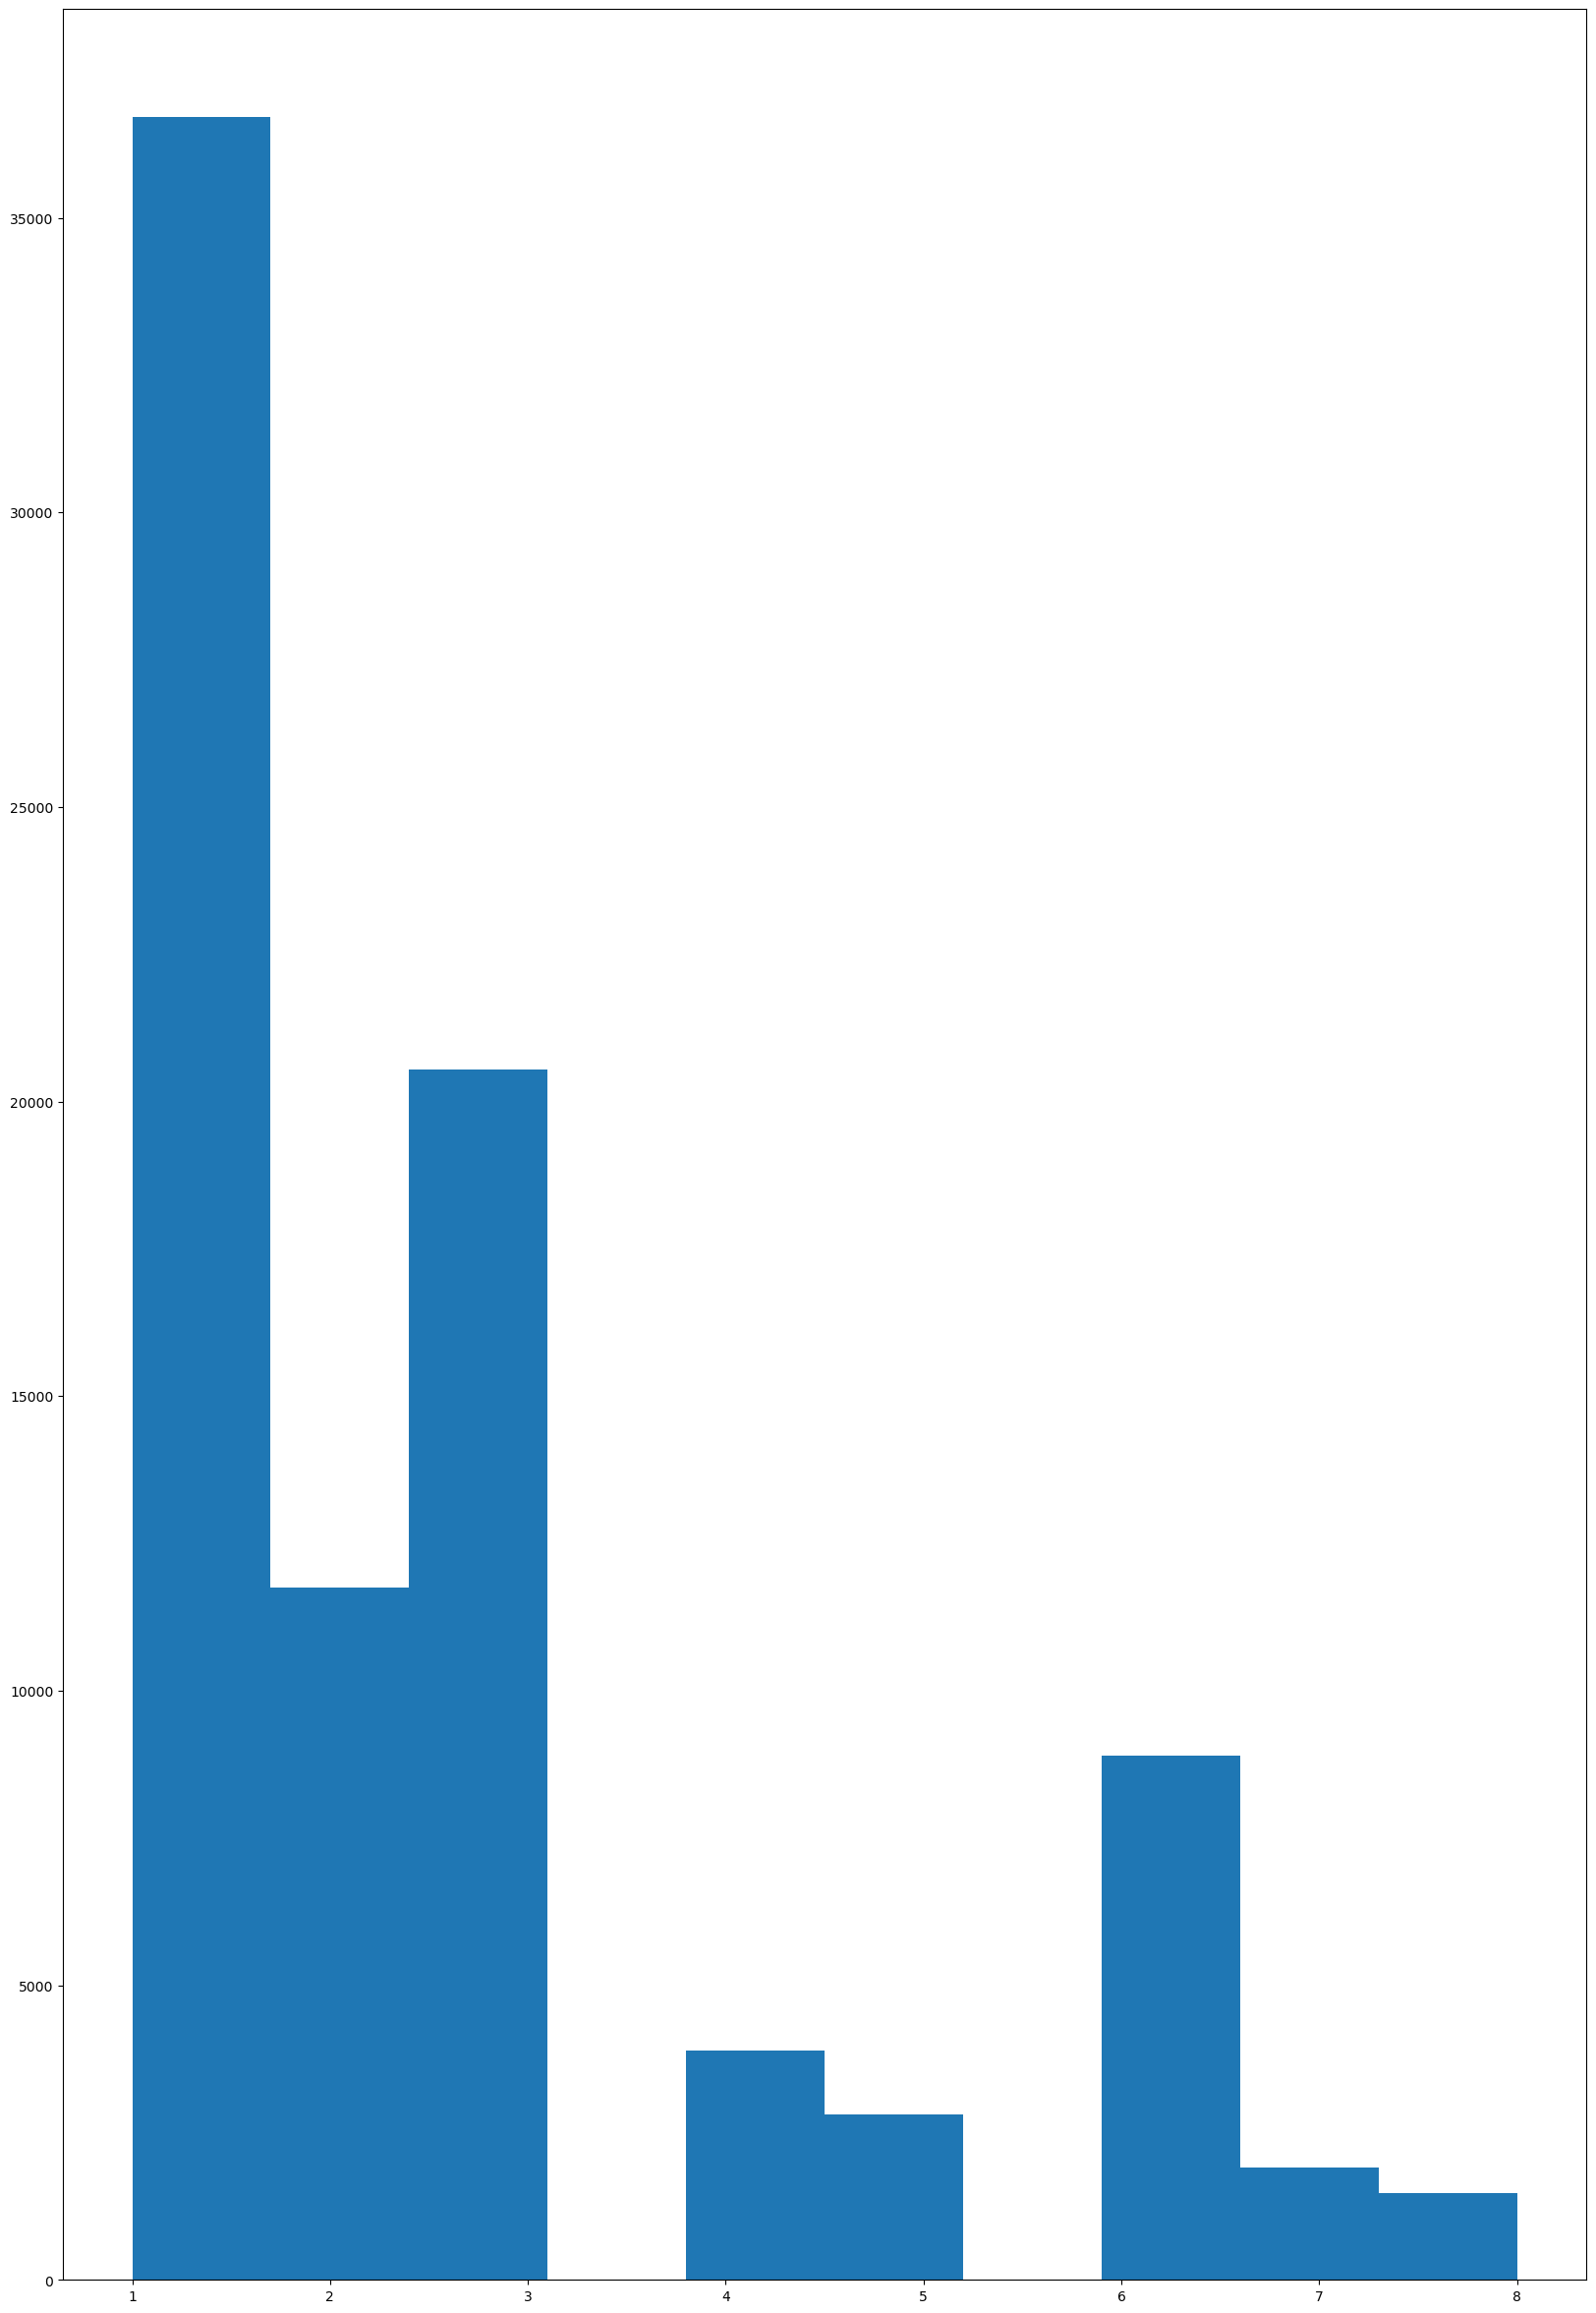

In [108]:
plt.figure(figsize=(20,30))
plt.hist(df.EdLevel)

In [109]:
null_count = df['YearsCodePro'].isnull().sum()
null_count

21837

In [110]:
df['YearsCodePro'].unique()

array(['9', '23', '7', '4', '21', '3', '15', nan, 'Less than 1 year',
       '10', '2', '6', '14', '5', '19', '13', '16', '28', '1', '30', '11',
       '8', '25', '32', '24', '40', '17', '45', '29', '12', '31', '20',
       '18', '50', '27', '43', '22', '26', '38', '33', '44', '35', '34',
       '37', '42', '41', 'More than 50 years', '47', '36', '39', '48',
       '46', '49'], dtype=object)

In [111]:
# Replace 'Less than 1 year' and 'More than 50 years' with numerical values
df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51}, inplace=True)

# Convert the 'YearsCodePro' column to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Fill NaN values with the median value
median_years_codepro = df['YearsCodePro'].median()
df['YearsCodePro'] = df['YearsCodePro'].fillna(median_years_codepro).astype(int)

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9628\2340444732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51}, inplace=True)
C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9628\2340444732.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9628\2340444732.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [112]:
df['YearsCodePro'].head()

1     9
2    23
3     7
4     4
5    21
Name: YearsCodePro, dtype: int32

In [113]:
#df['YearsCodePro'].fillna('nan', inplace=True)
#df["YearsCodePro"].unique()
#plt.scatter(df.YearsCodePro, df.ConvertedCompYearly)
#df_bar = df.loc[df["ConvertedCompYearly"] < 200000,['YearsCodePro','ConvertedCompYearly']].groupby('YearsCodePro').\
#median().sort_values("YearsCodePro").reset_index()

#plt.figure(figsize=(20,10))
#plt.bar(df_bar.YearsCodePro, df_bar.ConvertedCompYearly)
#df_bar.head()

In [114]:
df.DevType.unique()

array(['Senior Executive (C-Suite, VP, etc.)', 'Developer, back-end',
       'Developer, front-end', 'Developer, full-stack',
       'System administrator',
       'Developer, desktop or enterprise applications',
       'Developer, QA or test', 'Designer',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional', 'Educator',
       'Research & Development role', nan, 'Other (please specify):',
       'Developer, mobile', 'Database administrator',
       'Developer, embedded applications or devices', 'Student',
       'Engineer, data', 'Hardware Engineer', 'Product manager',
       'Academic researcher', 'Developer, game or graphics',
       'Cloud infrastructure engineer', 'Engineering manager',
       'Developer Experience', 'Project manager', 'DevOps specialist',
       'Engineer, site reliability', 'Blockchain', 'Developer Advocate',
       'Scientist', 'Marketing or sales professional'], dtype=object)

In [115]:
df = df_raw.dropna(subset= ['DevType'])

In [116]:
df['DevType'].isnull().sum()

0

Change the str to numbers

In [117]:
df.YearsCode.unique()

array(['18', '27', '12', '6', '21', '4', '5', '20', '14', '10', '15',
       '11', '3', '24', '8', '13', 'Less than 1 year', '16', '33', '22',
       '30', '32', '35', '28', '40', '17', '7', '29', '19',
       'More than 50 years', '9', '38', '26', '34', '25', '2', '23', nan,
       '45', '31', '43', '48', '1', '41', '50', '42', '37', '39', '36',
       '44', '46', '49', '47'], dtype=object)

In [118]:
# Replace 'Less than 1 year' and 'More than 50 years' with numerical values
df['YearsCode'].replace({'Less than 1 year': 0, 'More than 50 years': 51}, inplace=True)

# Convert the 'YearsCode' column to numeric, coercing errors to NaN
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')

# Fill NaN values with the median value
median_years_code = df['YearsCode'].median()
df['YearsCode'] = df['YearsCode'].fillna(median_years_code).astype(int)

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9628\1303471461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCode'].replace({'Less than 1 year': 0, 'More than 50 years': 51}, inplace=True)
C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9628\1303471461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9628\1303471461.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'YearsCode')

Text(0, 0.5, 'ConvertedCompYearly')

Text(0.5, 1.0, 'Scatter Plot of YearsCode vs ConvertedCompYearly')

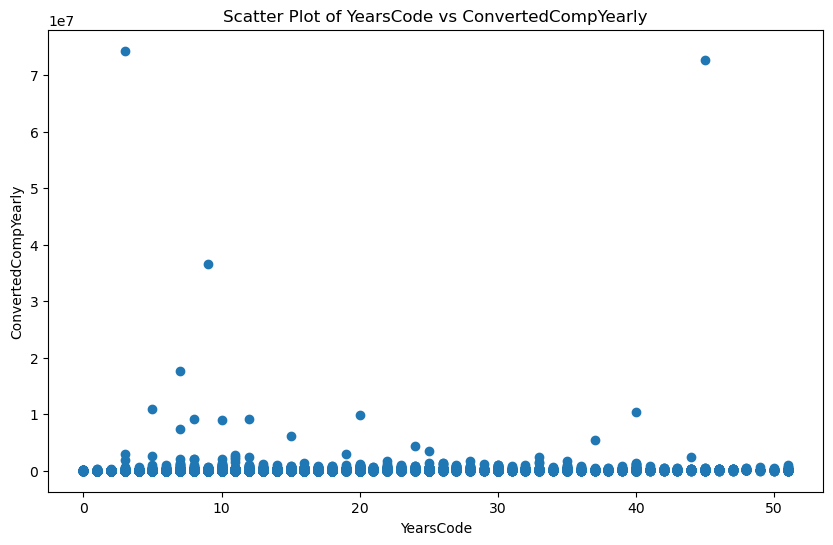

In [119]:
plt.figure(figsize=(10, 6))
plt.scatter(df['YearsCode'], df['ConvertedCompYearly'])
plt.xlabel('YearsCode')
plt.ylabel('ConvertedCompYearly')
plt.title('Scatter Plot of YearsCode vs ConvertedCompYearly')
plt.show()

In [120]:
#plt.scatter (df['YearsCodePro'], df['ConvertedCompYearly'])
#plt.title ('Compensation vs Years of code')
#plt.xlabel('YearsCodePro')
#plt.ylabel ('ConvertedCompYearly')
#plt.show()

### Ideas to go on
-plots and visualisation
-salaries with: countries(continent)/only Europe/ job title/experience
-survey from previous years

In [121]:
countries=pd.read_csv("Countries.csv", on_bad_lines='skip')
countries.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [122]:
euCountries = countries[countries.Continent == "Europe"]["Country"]
euCountries.tolist()

dfEU = df[df.Country.isin(euCountries)]  
dfEU.head()


['Albania',
 'Andorra',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'CZ',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macedonia',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'San Marino',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Kingdom',
 'Vatican City']

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,...,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
8,9,I agree,"I am not primarily a developer, but I write code sometimes as part of my work/studies",45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum)",Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;How-to videos;Video-based Online Courses;Written-based Online Courses;Written Tutorials;Click to write Choice 20;Stack Overflow,Udemy;Pluralsight,20,15,System administrator,100 to 499 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,64254.0
14,15,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","On the job training;Other online resources (e.g., videos, blogs, forum)",Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Written Tutorials,NaN,15,7,"Developer, full-stack","10,000 or more employees",...,Strongly agree,Strongly agree,Agree,Disagree,Agree,Never,6-10 times a week,1-2 times a week,15-30 minutes a day,Over 120 minutes a day,Microservices;Observability tools;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery,Other,Appropriate in length,Easy,187407.0
15,16,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Professional development or self-paced learning from online courses,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Other online resources (e.g., videos, blogs, forum)",Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Written Tutorials;Click to write Choice 20;Stack Overflow,NaN,15,10,"Developer, back-end",100 to 499 employees,...,Disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,Neither agree nor disagree,1-2 times a week,1-2 times a week,1-2 times a week,15-30 minutes a day,15-30 minutes a day,Microservices;Automated testing;Observability tools;Continuous integration (CI) and (more often) continuous delivery,"Manufacturing, Transportation, or Supply Chain",Too long,Neither easy nor difficult,107090.0
16,17,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Coding Bootcamp,NaN,NaN,4,2,"Developer, front-end","1,000 to 4,999 employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,45149.0
17,18,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Colleague;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Auditory material (e.g., podcasts);Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow;Interactive tutorial;Programming Games",NaN,11,6,"Developer, front-end",500 to 999 employees,...,Agree,Agree,Disagree,Neither agree nor disagree,Disa

In [123]:
df.merge(countries, on="Country", how="right")

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,...,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly,Continent
0,3311.0,I agree,I am a developer by profession,25-34 years old,"Not employed, but looking for work",NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, forum)",Formal documentation provided by the owner of the tech;Blogs with tips and tricks;How-to videos;Written Tutorials;Click to write Choice 20;Stack Overflow,NaN,8.0,NaN,"Developer, desktop or enterprise applications",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,Africa
1,3642.0,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)",Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;How-to videos;Video-based Online Courses;Written Tutorials;Stack Overflow;Interactive tutorial,NaN,6.0,2,"Developer, full-stack",2 to 9 employees,...,Neither agree nor disagree,NaN,Strongly agree,Agree,1-2 times a week,1-2 times a week,NaN,60-120 minutes a day,Less than 15 minutes a day,None of these,NaN,Appropriate in length,Neither easy nor difficult,6586.0,Africa
2,3697.0,I agree,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Hobby;Bootstrapping a business;Professional development or self-paced learning from online courses,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Written-based Online Courses;Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Stack Overflow",NaN,5.0,Less than 1 year,"Developer, back-end",20 to 99 employees,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,1-2 times a week,3-5 times a week,Never,30-60 minutes a day,15-30 minutes a day,NaN,"Information Services, IT, Software Development, or other Technology",Appropriate in length,Easy,NaN,Africa
3,3811.0,I agree,"I am not primarily a developer, but I write code sometimes as part of my work/studies",25-34 years old,"Employed, part-time","Hybrid (some remote, some in-person)",Freelance/contract work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Online Courses or Certification;Other online resources (e.g., videos, blogs, forum)",How-to videos;Video-based Online Courses;Stack Overflow,Other;Udemy,5.0,5,Academic researcher,2 to 9 employees,...,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,6-10 times a week,1-2 times a week,1-2 times a week,60-120 minutes a day,30-60 minutes a day,None of these,Higher Education,Appropriate in length,Neither easy nor difficult,NaN,Africa
4,5257.0,I agree,"I am not primarily a developer, but I write code sometimes as part of my work/studies",35-44 years old,"Employed, full-time",In-person,Contribute to open-source projects;Professional development or self-paced learning from online courses,Something else,"Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum)",Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Written Tutorials;Click to write Choice 20;Stack Overflow;Interactive tutorial,Pluralsight,10.0,2,System administrator,"5,000 to 9,999 employees",...,Agree,Agree,Disagre

In [124]:
df_2 = df.loc[df["Country"].isin(["United States of America","Germany","United Kingdom of Great Britain and Northern Ireland"]),['EdLevel','DevType','Country','ConvertedCompYearly']]
df_2.head()

,EdLevel,DevType,Country,ConvertedCompYearly
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Senior Executive (C-Suite, VP, etc.)",United States of America,285000.0
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end",United States of America,250000.0
3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end",United States of America,156000.0
5,Some college/university study without earning a degree,"Developer, back-end",United Kingdom of Great Britain and Northern Ireland,96828.0
6,Some college/university study without earning a degree,"Developer, full-stack",United States of America,135000.0


In [125]:
df_2.DevType.value_counts().reset_index().head(15)

,index,DevType
0,"Developer, full-stack",9488
1,"Developer, back-end",4357
2,"Developer, desktop or enterprise applications",1533
3,"Developer, front-end",1429
4,Other (please specify):,1359
5,Engineering manager,940
6,"Developer, embedded applications or devices",821
7,Student,710
8,"Developer, mobile",668
9,"Senior Executive (C-Suite, VP, etc.)",571


In [126]:
df_3 = df_2.groupby(['Country','DevType','EdLevel']).agg({'ConvertedCompYearly' : ['mean', 'min', 'max', 'count']})\
.reset_index()
df_3.columns = ['Country','DevType','EdLevel','mean', 'min', 'max', 'count']
df_3 = df_3[df_3['count']>10]
df_3

,Country,DevType,EdLevel,mean,min,max,count
1,Germany,Academic researcher,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",56910.615385,41.0,117798.0,91
2,Germany,Academic researcher,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",72845.488889,48190.0,149925.0,45
11,Germany,Cloud infrastructure engineer,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",82870.692308,49261.0,149925.0,13
12,Germany,Cloud infrastructure engineer,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",100499.678571,51403.0,342687.0,28
15,Germany,Cloud infrastructure engineer,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",79781.818182,10709.0,123153.0,11
...,...,...,...,...,...,...,...
607,United States of America,"Senior Executive (C-Suite, VP, etc.)",Some college/university study without earning a degree,232314.814815,2500.0,500000.0,27
617,United States of America,System administrator,"Associate degree (A.A., A.S., etc.)",78458.333333,20000.0,150000.0,12
618,United States of America,System administrator,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",98196.809524,45000.0,300000.0,42
619,United States of America,System administrator,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",112241.818182,88000.0,150000.0,11


In [127]:
df_3G = df_3.loc[df_3["Country"]=="Germany",['DevType', 'EdLevel', 'mean']]
df_3U = df_3.loc[df_3["Country"]=="United States of America",['DevType', 'EdLevel', 'mean']]
df_3UK = df_3.loc[df_3['Country']=="United Kingdom of Great Britain and Northern Ireland", ['DevType', 'EdLevel', 'mean']]

In [128]:
median_WorkExp = df['WorkExp'].median()
df['WorkExp'] = df['WorkExp'].fillna(median_WorkExp).astype(int)

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9628\1282882367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WorkExp'] = df['WorkExp'].fillna(median_WorkExp).astype(int)


In [129]:
df.WorkExp.unique()

array([10, 23,  7,  6, 22,  4,  5,  9,  3, 15, 14, 18, 13, 39,  2, 28, 12,
       17, 25, 11, 16, 30, 20, 24, 19,  1,  8, 26, 38, 27, 32, 21, 40,  0,
       34, 35, 29, 33, 37, 36, 31, 48, 45, 42, 43, 44, 50, 41, 46, 47, 49])

In [130]:
value_null = df['RemoteWork'].isnull().sum()
value_null

3362

In [131]:
df.dropna(subset=['RemoteWork'], inplace=True)

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9628\2972427108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['RemoteWork'], inplace=True)


In [132]:
df.RemoteWork.unique()

array(['Remote', 'Hybrid (some remote, some in-person)', 'In-person'],
      dtype=object)

In [133]:
df.dropna(subset = ['OrgSize'], inplace= True)
counts= df['OrgSize'].isnull().sum()
df.OrgSize.unique()

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9628\1607803156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = ['OrgSize'], inplace= True)


array(['2 to 9 employees', '5,000 to 9,999 employees',
       '100 to 499 employees', '20 to 99 employees',
       '1,000 to 4,999 employees', '10 to 19 employees',
       '10,000 or more employees', '500 to 999 employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       'I don’t know'], dtype=object)

## Data Cleaning before Machine learning

In [134]:
df.dropna(subset=['WorkExp'], inplace=True)

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9628\4001541622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['WorkExp'], inplace=True)


In [135]:
df.LanguageHaveWorkedWith.unique()

array(['HTML/CSS;JavaScript;Python', 'Bash/Shell (all shells);Go',
       'Bash/Shell (all shells);HTML/CSS;JavaScript;PHP;Ruby;SQL;TypeScript',
       ..., 'Groovy;HTML/CSS;Java;JavaScript;PHP;Python;R;SQL;VBA',
       'Bash/Shell (all shells);HTML/CSS;JavaScript;Perl;PHP;Python;SAS;SQL',
       'Bash/Shell (all shells);C#;C++;Cobol;Groovy;PHP;PowerShell'],
      dtype=object)

In [136]:
df.dropna(subset =['LanguageHaveWorkedWith'], inplace = True)

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9628\119426099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset =['LanguageHaveWorkedWith'], inplace = True)


In [137]:
columns_to_drop_na = ['EdLevel', 'RemoteWork', 'Employment', 'LanguageHaveWorkedWith','OrgSize', 'DevType', 'ConvertedCompYearly', 'YearsCode', 'YearsCodePro', 'WorkExp', 'Country']
df = df.dropna(subset=columns_to_drop_na)

In [138]:
#selected_countries = ["United States of America", "Germany", "United Kingdom of Great Britain and Northern Ireland"]
#df_6 = df[df['Country'].isin(selected_countries)][['Country', 'LanguageHaveWorkedWith','EdLevel', 'RemoteWork', 'Employment', 'OrgSize', 'DevType', 'ConvertedCompYearly', 'YearsCode', 'YearsCodePro', 'WorkExp']]
#df_6.head()

In [139]:
#selected_country = [ "Germany"]
#df_6 = df[df['Country'].isin(selected_country)][['Country', 'EdLevel', 'RemoteWork', 'Employment', 'OrgSize', 'DevType', 'ConvertedCompYearly', 'YearsCode', 'YearsCodePro', 'WorkExp']]
#df_6.head()

In [140]:
selected_country = [ "Germany"]
df_6 = df[df['Country'].isin(selected_country)][['Country', 'EdLevel', 'RemoteWork', 'OrgSize', 'DevType', 'ConvertedCompYearly', 'YearsCode']]
df_6.head()

,Country,EdLevel,RemoteWork,OrgSize,DevType,ConvertedCompYearly,YearsCode
15,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Hybrid (some remote, some in-person)",100 to 499 employees,"Developer, back-end",107090.0,15
19,Germany,Some college/university study without earning a degree,"Hybrid (some remote, some in-person)",20 to 99 employees,"Developer, full-stack",75010.0,24
21,Germany,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Remote,500 to 999 employees,Data scientist or machine learning specialist,85672.0,20
23,Germany,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Remote,500 to 999 employees,Data or business analyst,69608.0,13
32,Germany,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)","Hybrid (some remote, some in-person)",10 to 19 employees,"Developer, back-end",53545.0,10


In [141]:
#categorical_cols = ['EdLevel', 'RemoteWork','Employment', 'LanguageHaveWorkedWith','OrgSize', 'DevType', 'Country']
#numerical_cols= ['ConvertedCompYearly', 'YearsCode','YearsCodePro', 'WorkExp']

In [142]:
categorical_cols = ['EdLevel', 'RemoteWork', 'OrgSize', 'DevType', 'Country']
numerical_cols= ['ConvertedCompYearly', 'YearsCode']

In [143]:
df_6[numerical_cols] = df_6[numerical_cols].astype(float)

In [144]:
df_ML= df_6[categorical_cols+numerical_cols].copy()

In [145]:
df_encoded = pd.get_dummies (df_ML, columns = categorical_cols, prefix ='', prefix_sep ='')

## Machine Learning

In [146]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [147]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [148]:
X = df_encoded.drop('ConvertedCompYearly', axis=1)  
y = df_encoded['ConvertedCompYearly']

In [149]:
# Find column indices of categorical columns in the DataFrame
categorical_cols_indices = [X.columns.get_loc(col) for col in categorical_cols if col in X.columns]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [151]:
# Create DMatrix objects specifying feature types
dtrain = xgb.DMatrix(X_train, label=y_train, feature_types=['float'] * len(X_train.columns))
dtest = xgb.DMatrix(X_test, label=y_test, feature_types=['float'] * len(X_test.columns))

In [152]:
# Assign 'categorical' feature type to categorical columns
for col_index in categorical_cols_indices:
    dtrain.set_feature(feature_id=col_index, feature_type='categorical')
    dtest.set_feature(feature_id=col_index, feature_type='categorical')

In [153]:
# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Use 'reg:squarederror' for regression tasks
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the XGBoost model
num_round = 100
model = xgb.train(params, dtrain, num_boost_round=num_round)

In [154]:
# Make predictions on the test set
predictions = model.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2848276680.1010895
R-squared: 0.11252313186524576


In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
# Define a grid of hyperparameters to search
#param_grid = {
    #'max_depth': [3, 6, 9],
    #'learning_rate': [0.05, 0.1, 0.2],
    #'subsample': [0.6, 0.8, 1.0],
    #'colsample_bytree': [0.6, 0.8, 1.0],
   # 'n_estimators': [100, 200, 300]
    # Add more hyperparameters to the grid if needed
#}

In [157]:
param_grid = {
    'max_depth': [3, 6, 9, 12, 15],  # Expanded range for max_depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Fine-tuned learning rates
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],  # More values for subsample
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],  # More values for colsample_bytree
    'n_estimators': [100, 200, 300, 400, 500]
    }

In [158]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')  # Use 'reg:squarederror' for regression tasks

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


In [76]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


In [77]:
predictions = best_estimator.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Best hyperparameters: {best_params}")


Mean Squared Error: 2857711559.0831504
R-squared: 0.10958337643041483
Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
